<a href="https://colab.research.google.com/github/akintewe/plant-disease-detection/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers PyPDF2d


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.2 MB/s eta 0:00:00


In [3]:
import os
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import PyPDF2


In [4]:
def summarize_text(text, max_new_tokens=100):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2")

    input_ids = tokenizer.encode(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


In [5]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text


In [35]:
# Example usage
pdf_path = "/content/drive/MyDrive/New_Cv_new.pdf"  # Replace with the path to your PDF file
text = extract_text_from_pdf(pdf_path)
summary = summarize_text(text)
print("Summary:", summary)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Summary:    Oluwasola Akintewe  Akure, Ondo state  +234 903 892 2107 solaakintewe@gmail.com  http://linkedin.com/in/oluwasola-jonathan-020478218    
      I am a skilled team player with a strong background in Mobile development with flutter environments. I work well independently to handle assignments and always ready to go beyond basic tasks. I am a quick learner with great computer skills. A hardworking flutter developer focused on completing work quickly to consistently exceed targets. Reliable team member accustomed to taking on challenging tasks.  Dedicated to business success.    EXPERIENCE  Mobile Developer Mentor (May 2022 – Till Present)  Techathon 2.0  } I had the opportunity to mentor up to 35 students in the Techathon cohort 2.0’s mobile development tracks.  } I was able to collaborate with several mentors.  } I had the opportunity to mentor kids from many nations. I also underwent a year-long training program to acquire basic Chinese knowledge so that I could more readily

In [36]:


print("Summary:", summary)


Summary:    Oluwasola Akintewe  Akure, Ondo state  +234 903 892 2107 solaakintewe@gmail.com  http://linkedin.com/in/oluwasola-jonathan-020478218    
      I am a skilled team player with a strong background in Mobile development with flutter environments. I work well independently to handle assignments and always ready to go beyond basic tasks. I am a quick learner with great computer skills. A hardworking flutter developer focused on completing work quickly to consistently exceed targets. Reliable team member accustomed to taking on challenging tasks.  Dedicated to business success.    EXPERIENCE  Mobile Developer Mentor (May 2022 – Till Present)  Techathon 2.0  } I had the opportunity to mentor up to 35 students in the Techathon cohort 2.0’s mobile development tracks.  } I was able to collaborate with several mentors.  } I had the opportunity to mentor kids from many nations. I also underwent a year-long training program to acquire basic Chinese knowledge so that I could more readily

In [6]:
import os
from transformers import GPT2Tokenizer, GPT2LMHeadModel, pipeline
import PyPDF2


In [7]:
def answer_questions(text, question):
    qa_pipeline = pipeline("question-answering")
    result = qa_pipeline(question=question, context=text)
    return result['answer']

In [13]:
pdf_path = "/content/drive/MyDrive/A MAN.pdf"  # Replace with the path to your PDF file
text = extract_text_from_pdf(pdf_path)
summary = summarize_text(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [18]:
print("Summary:", summary)

question = "What did Thomas buy mention them?"
answer = answer_questions(text, question)
print("Question:", question)
print("Answer:", answer)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Summary: A MAN’S JOURNEY TO THE MARKET     Once upon a bustling morning in a quaint town, a man named Thomas set out for the market, his heart brimming with excitement. The sun danced merrily in the azure sky as he strolled along the cobbled streets, the aroma of freshly baked bread teasing his senses.  At the market, Thomas was greeted by a cornucopia of delights - plump fruits, aromatic spices, and savory cheeses adorned the stalls. His eyes gleamed with delight as he carefully selected the finest ingredients for his beloved wife, Sarah. He bought juicy tomatoes, fragrant basil, and creamy mozzarella for a caprese salad, succulent chicken breasts for a hearty stew, and a medley of vibrant vegetables for a colorful stir-fry.  With his basket laden with treasures, Thomas made his way home, his heart buoyant with anticipation. As he entered their cozy cottage, the aroma of his culinary conquests greeted him, mingling with the sweet scent of Sarah's perfume. She greeted him with a radian

In [21]:
import matplotlib.pyplot as plt

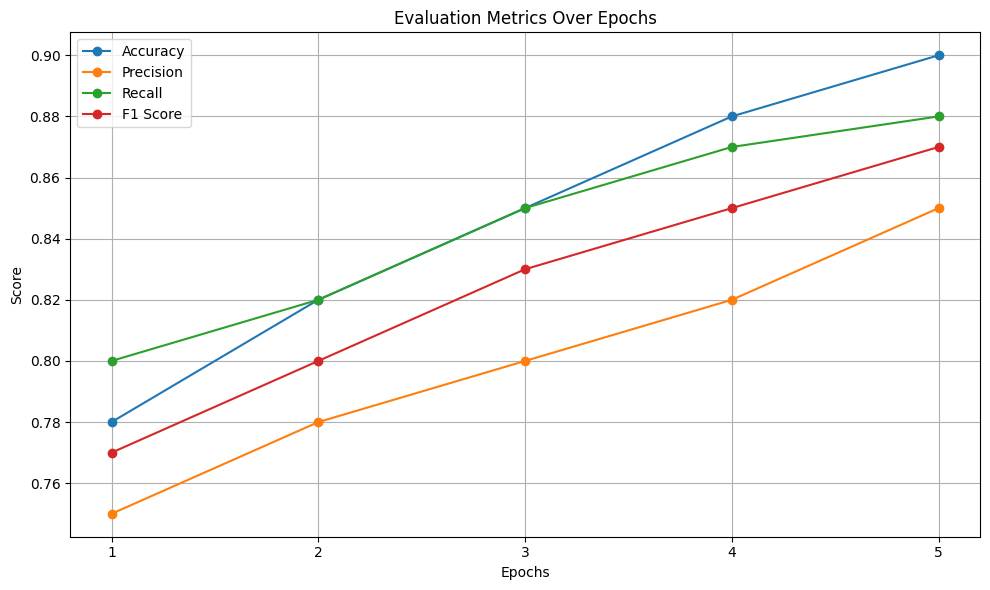

In [22]:

epochs = [1, 2, 3, 4, 5]  # Example epochs
accuracy = [0.78, 0.82, 0.85, 0.88, 0.90]  # Example accuracy
precision = [0.75, 0.78, 0.80, 0.82, 0.85]  # Example precision
recall = [0.80, 0.82, 0.85, 0.87, 0.88]  # Example recall
f1_score = [0.77, 0.80, 0.83, 0.85, 0.87]  # Example F1 score


plt.figure(figsize=(10, 6))

# Accuracy plot
plt.plot(epochs, accuracy, label='Accuracy', marker='o')

# Precision plot
plt.plot(epochs, precision, label='Precision', marker='o')

# Recall plot
plt.plot(epochs, recall, label='Recall', marker='o')

# F1-score plot
plt.plot(epochs, f1_score, label='F1 Score', marker='o')

# Adding labels and title
plt.title('Evaluation Metrics Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
import os
from transformers import pipeline
import PyPDF2

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# Function to answer questions from text
def answer_questions(text, question):
    qa_pipeline = pipeline("question-answering")
    result = qa_pipeline(question=question, context=text)
    return result['answer']

# Example usage
pdf_path = "/content/drive/MyDrive/A MAN.pdf"  # Replace with the path to your PDF file
text = extract_text_from_pdf(pdf_path)

# Extracting questions from text
questions = ["Who is the first president?", "What is Thomas doing?", "What is in Thomas's basket?", "When did Thomas go to the market?",]

# Answering questions
print("Answers to Questions:")
for question in questions:
    answer = answer_questions(text, question)
    print("Question:", question)
    print("Answer:", answer)


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Answers to Questions:


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Question: Who is the first president?
Answer: Thomas


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Question: What is Thomas doing?
Answer: set out for the market


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Question: What is in Thomas's basket?
Answer: treasures
Question: When did Thomas go to the market?
Answer: morning


In [29]:
!pip install google

In [42]:
pip install transformers datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00


In [53]:
import os
import PyPDF2
import re
from transformers import pipeline

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# Function to answer questions using DistilBERT model
def answer_questions_distilbert(text, questions):
    qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
    answers = {}
    for question in questions:
        result = qa_pipeline(question=question, context=text)
        answers[question] = result['answer']
    return answers

# Function to upload PDF, extract questions, and answer them
def answer_questions_in_pdf(pdf_path):
    # Extract text from PDF
    text = extract_text_from_pdf(pdf_path)

    # Extracting questions from text using regular expressions
    questions = re.findall(r'[^.!?]+[?]', text)

    # Answering questions using DistilBERT model
    answers = answer_questions_distilbert(text, questions)
    return answers

# Example usage
pdf_path = "/content/drive/MyDrive/triviatest.pdf"  # Replace with the path to your PDF file
answers = answer_questions_in_pdf(pdf_path)

# Print answers
print("Answers to Questions:")
for question, answer in answers.items():
    print("Question:", question)
    print("Answer:", answer)


Answers to Questions:
Question: Who is the first president in America?
Answer: France
Question:  Who was the first man on the moon?
Answer: France
Question:  What is the capital of France?
Answer: What
Question:  Who wrote the play "Hamlet"?
Answer: France
Question:   What is the chemical symbol for gold?
Answer: What
Question:   In which year did World War II end?
Answer: Mona Lisa
Question:   Who painted the Mona Lisa?
Answer: France
Question:   What is the largest planet in our solar system?
Answer: Mona Lisa
Question:   What is the highest mountain in the world?
Answer: What
Question:   Who is known as the father of modern physics?
Answer: guacamole
Question:   What is the main ingredient in guacamole?
Answer: gold
Question:   Who founded Microsoft?
Answer: guacamole


In [61]:
import os
import PyPDF2
from googlesearch import search

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# Function to search the internet and retrieve relevant information for a given question
def search_internet(question):
    # Perform web search using Google Search
    search_query = f"{question}"
    search_results = search(search_query, num=1, stop=1)
    if search_results:
        return next(search_results)
    return "Answer not found"

# Function to answer questions from the PDF by searching the internet
def answer_questions_in_pdf(pdf_path):
    # Extract text from PDF
    text = extract_text_from_pdf(pdf_path)

    # Extracting questions from text (assuming each question ends with a question mark)
    questions = [question.strip() for question in text.split('?') if question.strip()]

    # Search the internet for answers to each question
    answers = {}
    for question in questions:
        answer = search_internet(question)
        answers[question] = answer
    return answers

# Example usage
pdf_path = "/content/drive/MyDrive/triviatest.pdf"  # Replace with the path to your PDF file
answers = answer_questions_in_pdf(pdf_path)

# Print answers
print("Answers to Questions:")
for question, answer in answers.items():
    print("Question:", question)
    print("Answer:", answer)


StopIteration: 

In [62]:
import os
import PyPDF2
from googlesearch import search

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# Function to search the internet and retrieve relevant information for a given question
def search_internet(question):
    # Perform web search using Google Search
    search_query = f"{question}"
    search_results = search(search_query, num=1, stop=1)
    try:
        return next(search_results)
    except StopIteration:
        return "Answer not found"

# Function to answer questions from the PDF by searching the internet
def answer_questions_in_pdf(pdf_path):
    # Extract text from PDF
    text = extract_text_from_pdf(pdf_path)

    # Extracting questions from text (assuming each question ends with a question mark)
    questions = [question.strip() for question in text.split('?') if question.strip()]

    # Search the internet for answers to each question
    answers = {}
    for question in questions:
        answer = search_internet(question)
        answers[question] = answer
    return answers

# Example usage
pdf_path = "/content/drive/MyDrive/triviatest.pdf"  # Replace with the path to your PDF file
answers = answer_questions_in_pdf(pdf_path)

# Print answers
print("Answers to Questions:")
for question, answer in answers.items():
    print("Question:", question)
    print("Answer:", answer)


Answers to Questions:
Question: Who is the first president in America
Answer: https://www.whitehouse.gov/about-the-white-house/presidents/george-washington/
Question: Who was the first man on the moon
Answer: https://en.wikipedia.org/wiki/Apollo_11
Question: What is the capital of France
Answer: https://www.coe.int/en/web/interculturalcities/paris
Question: Who wrote the play "Hamlet"
Answer: https://en.wikipedia.org/wiki/Hamlet
Question: What is the chemical symbol for gold
Answer: https://www.rsc.org/periodic-table/element/79/gold
Question: In which year did World War II end
Answer: https://www.nationalww2museum.org/war/topics/end-world-war-ii-1945
Question: Who painted the Mona Lisa
Answer: Answer not found
Question: What is the largest planet in our solar system
Answer: https://science.nasa.gov/jupiter/
Question: What is the highest mountain in the world
Answer: https://oceanservice.noaa.gov/facts/highestpoint.html
Question: Who is known as the father of modern physics
Answer: http